## Implement a Basic Driving Agent

**QUESTION** Observe what you see with the agent's behavior as it takes random actions. Does the **smartcab** eventually make it to the destination? Are there any other interesting observations to note?

**ANSWER**
*When set the agent to take random actons, the **smartcab** would drive around randomly. After letting it drives around for long enough, eventually, sometimes it gets lucky and it does make it to the destination. But it appears to be completely random and due to luck. It also appears that the **smartcab** would sometimes break transportation rules and run into accidents, but it does not seem to learn from mistakes. Its behavior does not seem to improve even after recieving penalty, nor does it appear to responding to rewards.*
***

## Inform the Driving Agent

**QUESTION** What states have you identified that are appropriate for modeling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

**ANSWER** 
*The self.state `[self.state=(inputs['light'], inputs['oncoming'], inputs['left'], inputs['right'], self.next_waypoint)]` attribute for LearningAgent is set to be taking the following three conditions into consideration as for the purpose of modeling the smartcab and its environment: 1) the transportation light (green or red); 2) the traffic situation at the intersection (whether or not there is traffic in the oncoming, left, and right directions); 3) the planned next way point. The overall goal of one smartcab trip is to get to the destination **without violating transportation rules nor running into accidents** as fast as possible, hence the state of transportation light of an intersection is important state information to inform the LearningAgent so that it could learn not to violate transportation rule (would receive negative rewards if it violates). The information regarding to traffic state around the smartcab and its next way point is crucial for teaching the LearningAgent to drive safely. The agent's variable `[deadline]` is another factor which is potentially useful state information, however it was not added into forming the LearningAgent's self.state attribute. Because adding `[deadline]` expands the number of self.state by a factor of 20~30. The solution to the MDP problem asks the algorithm to visit every states infinitely often, given the setting of the number of simulation trial runs (~100), a relatively smaller size of self.state is more desireable. In addition, the practical training result of this self.state setting without `[deadline]` info seems to be good enough. (details see the following sections)*
***
**QUESTION** How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

**ANSWER**
*There are 32 states in total exist for the smartcab in this environment. This number seems reasonable for Q-Learning to learn and make informed decisions about each state. If set the trial run number of the simulation to be 100, and assume that for each trial simulation run, the smartcab takes 20 actions and experiences 20 states on average before it terminates (either because of successfully reach the destination or trip aborts due to run out of time), so the smartcab is expected to experience ~2000 states in total. This number seems to be reasonably large enough to ensure that all 32 states would be appeared/seen so that Q-Learning could learn about.*

## Implement a Q-Learning Agent

**QUESTION** What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

**ANSWER**
*After implementing Q-Learning, the agent appears to be no longer randomly driving around, and it seems to be responding to the rewards and penalties that its receiving after taking certain actions while its at certain states. Its rate of deliverying customer to destination before time runs out obviously has improved as compared to when it's taking random behaviors. The reason for this difference is that Q-Learning algorithm `[Q(state, action) = Immediate_Reward + discount_factor x argmax (Q(future_state, future_action))]` is teaching the agent by rewarding agent's correct behavior (positive rewards for taking the right action at the right state), and punishing its incorrect behavior (negative rewards if it violates transportation rule or runs into accidents). *

## Improve the Q-Learning Driving Agent

**QUESTION** Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?

**ANSWER**
- *Tuned omega values: [0.7, 0.8, 0.9, 1.0, 2.0]. The learning rate is constructed using omega value: apha = 1/(t^(omega))*
- *Tuned gamma/discount factor values: [0.5, 0.6, 0.7, 0.8, 0.9]*
- *Tuned epsilon/exploration factor values: [0.1, 0.2, 0.3, 0.4, 0.5]*

*The performances regarding to different settings of tuned parameters are stored in data.csv. It is loaded and analyzed in the **Q-Learning Parameter Tuning-Performance Analysis** section.*

*The optimal parameter setting is omega = 0.7, gamma (discount factor) = 0.6, epsilon (exploration rate) = 0.3.*

*Using this parameter setting, the SmartCab acheived a success customer deliver rate of 0.96; it received an average penalty of -3.8, an average net reward of 21.81 during the 100-trial-run simulation. Its average time costs for delivering customer is 13.46 time step.*

***
**QUESTION**  Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?

**ANSWER**
*The LearningAgent appears to get close to finding an optimal policy which has a high customer delivery rate in relatively small time costs with high net reward and low penalty punishments. More details regarding to the parameter tunning and optimal parameter trained agent performance are analyzed and demonstrated in the following **Q-Learning Parameter Tuning-Performance Analysis** section. An optimal policy for this problem would be a policy which produces a series of optimal actions for each state that the SmartCab is in, and this series of optimal actions would guide the SmartCab to accomplish the mission (delivery the customer to its destination) in the shortest time step possible with no violation of traffic rule and no occurrence of accidence (hence results in low penalties and high rewards).*

### Q-Learning Parameter Tuning - Performance Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = pd.read_csv('data.csv')
data = data.drop('Unnamed: 0', axis=1)

In [11]:
data.head()

,deadline,destination,end_time,net_reward,parameters,penalty,start,success
0,25,"(3, 1)",0,0.0,"(1.0, 0.5, 0.1)",0.0,"(1, 4)",False
1,30,"(2, 6)",28,1.5,"(1.0, 0.5, 0.1)",-10.5,"(3, 1)",True
2,35,"(1, 5)",19,11.5,"(1.0, 0.5, 0.1)",-0.5,"(7, 4)",True
3,35,"(8, 4)",5,15.5,"(1.0, 0.5, 0.1)",-6.5,"(4, 1)",True
4,40,"(8, 1)",22,20.0,"(1.0, 0.5, 0.1)",-12.0,"(4, 5)",True


In [12]:
data.describe()

,deadline,end_time,net_reward,penalty
count,12500.000000,12500.000000,12500.000000,12500.000000
mean,29.850400,13.071920,16.530880,-5.829440
std,8.693657,10.035158,10.795724,4.845859
min,20.000000,0.000000,-19.500000,-31.500000
25%,25.000000,3.000000,12.500000,-8.500000
50%,30.000000,14.000000,18.500000,-4.500000
75%,35.000000,20.000000,23.500000,-2.000000
max,60.000000,59.000000,59.500000,0.000000


**Variable Description**
- **parameters**: a tuple containing (omega, gamma, epsilon)
    - omega is used to construct alpha, the learning rate by following the formula of `[alpha = 1/(t)^omega]`. Omega tunning values are picked from [.7, .8, .9, 1.0, 2.0]
    - gamma is the discount factor for the utility of future Q(state, action). Gamma tunning values are picked from [.5, .6, .7, .8, .9]
    - epsilon is the exploration rate. Each step, whether or not to take a random step to explore is determined by flipping a baised coin with (1-epsilon) chance of landing on head, and epsilon chance of landing on tail. If landing on head, the algorithm will take the action with the highest Q-Value; otherwise it will take a random valid action. Epsilon tuning values are picked from [.1, .2, .3, .4, .5]
- **start**: the coordinates of the start location where the smartcab picks up its customer
- **destination**: the destination of each simulation trial run
- **deadline**: the initial deadline goal for the smartcab to reach destination; or the value of the deadline when the smartcab first picks up its customer
- **end_time**: the final deadline value when the trial run terminates (either because of successfully delivery the customer before time runs out, or because of trial abortion due to run out of time)
- **net_reward**: the net rewards at the end of each trail run
- **penalty**: the total penalty that the smartcab received during each simulation trial run

***
**Success Rate for Delivering the Customer to Destination before Time Out**

In [27]:
param = set(data['parameters'])
success_rate = []
param_list = []
for p in param:
    param_list.append(p)
    p_bool = data['parameters']==p
    s = data['success'][p_bool]
    rate = sum(s)*1./len(s)
    success_rate.append(rate)

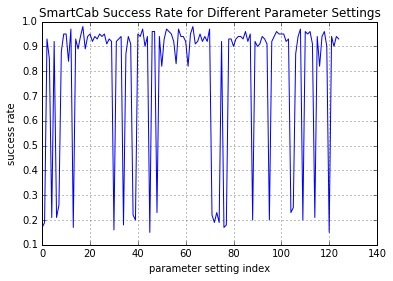

In [34]:
param_id = range(len(param))
plt.plot(param_id, success_rate)
plt.xlabel('parameter setting index'); plt.ylabel('success rate'); plt.grid(True)
plt.title("SmartCab Success Rate for Different Parameter Settings");plt.show()

In [33]:
low_success_rate = [i for i,r in enumerate(success_rate) if r<.5]
low_sr_param = [param_list[i] for i in low_success_rate]
low_sr_param

['(1.0, 0.9, 0.5)',
 '(2.0, 0.9, 0.5)',
 '(2.0, 0.8, 0.5)',
 '(0.9, 0.6, 0.5)',
 '(1.0, 0.6, 0.5)',
 '(0.7, 0.5, 0.5)',
 '(0.8, 0.7, 0.5)',
 '(0.7, 0.6, 0.5)',
 '(0.7, 0.9, 0.5)',
 '(0.7, 0.7, 0.5)',
 '(1.0, 0.7, 0.5)',
 '(2.0, 0.6, 0.5)',
 '(0.9, 0.8, 0.5)',
 '(0.8, 0.6, 0.5)',
 '(0.9, 0.7, 0.5)',
 '(2.0, 0.7, 0.5)',
 '(0.9, 0.5, 0.5)',
 '(0.9, 0.9, 0.5)',
 '(0.8, 0.8, 0.5)',
 '(1.0, 0.5, 0.5)',
 '(0.7, 0.8, 0.5)',
 '(1.0, 0.8, 0.5)',
 '(0.8, 0.5, 0.5)',
 '(0.8, 0.9, 0.5)',
 '(2.0, 0.5, 0.5)']

**Summary**: With an exploration rate of epsilon=0.5, the SmartCab has a low success rate (<0.5) in a 100 simulation trial runs. Drop the performance data records with epsilon=0.5 in the following analysis.

In [49]:
def find_low_epsilon(s):
    start = s.rfind(',')+1
    end = s.find(')')
    epsilon = float(s[start:end])
    if epsilon>=0.5:
        return False
    else:
        return True

In [50]:
low_epsilon_ids = data.index[data['parameters'].map(find_low_epsilon)]
data = data.loc[low_epsilon_ids]

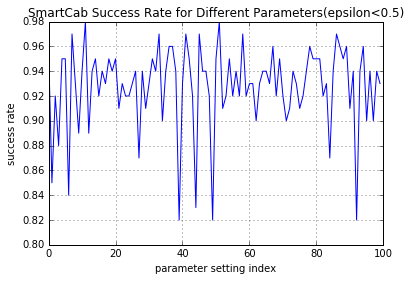

In [57]:
param = set(data['parameters'])
success_rate = []
param_list = []
for p in param:
    param_list.append(p)
    p_bool = data['parameters']==p
    s = data['success'][p_bool]
    rate = sum(s)*1./len(s)
    success_rate.append(rate)
param_id = range(len(param))
plt.plot(param_id, success_rate)
plt.xlabel('parameter setting index'); plt.ylabel('success rate'); plt.grid(True)
plt.title("SmartCab Success Rate for Different Parameters(epsilon<0.5)");plt.show()

In [58]:
high_success_rate = [i for i,r in enumerate(success_rate) if r>=.96]
high_sr_param = [param_list[i] for i in high_success_rate]
high_sr_param # the parameter settings acheived high success rate 

['(0.9, 0.7, 0.1)',
 '(2.0, 0.6, 0.2)',
 '(2.0, 0.9, 0.2)',
 '(0.9, 0.9, 0.3)',
 '(0.7, 0.6, 0.3)',
 '(0.8, 0.7, 0.4)',
 '(0.8, 0.6, 0.4)',
 '(0.8, 0.9, 0.1)',
 '(1.0, 0.5, 0.3)',
 '(0.9, 0.5, 0.1)',
 '(0.7, 0.6, 0.1)',
 '(0.8, 0.7, 0.1)',
 '(0.8, 0.9, 0.2)',
 '(2.0, 0.7, 0.2)',
 '(0.8, 0.8, 0.3)',
 '(0.7, 0.5, 0.4)']

***
**Average Penalty Analysis**

In [67]:
def count_negative(penalty):
    neg_pen = penalty < 0
    return sum(neg_pen)
penalty = data[['penalty','parameters']].groupby('parameters').agg({'penalty': ['mean',count_negative,'min']})

In [81]:
penalty.describe()

penalty                           
             mean count_negative         min
count  100.000000     100.000000  100.000000
mean    -4.367800      92.320000  -16.755000
std      0.453745       2.658624    3.284102
min     -5.765000      87.000000  -27.500000
25%     -4.631250      90.750000  -19.000000
50%     -4.345000      92.000000  -16.500000
75%     -4.043750      94.000000  -14.375000
max     -3.510000      99.000000  -10.000000

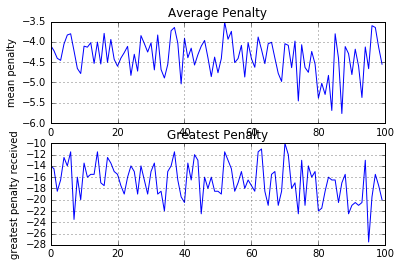

In [87]:
plt.subplot(2,1,1); plt.plot(param_id, penalty['penalty']['mean'])
plt.ylabel('mean penalty'); plt.grid(True); plt.title("Average Penalty")
plt.subplot(2,1,2); plt.plot(param_id, penalty['penalty']['min'])
plt.ylabel('greatest penalty received'); plt.grid(True); 
plt.title("Greatest Penalty");plt.show()

In [112]:
low_avg_penalty_param = list(penalty.index[penalty['penalty']['mean'] >= -4.05] ) # 75 percentile
low_min_penalty_param = list(penalty.index[penalty['penalty']['min'] >= -14.375] ) # 75 percentile
low_count_penalty_param = list(penalty.index[penalty['penalty']['count_negative'] <= 90.75]) # 25 percentile
low_penalty_param = list(set(low_min_penalty_param) & set(low_avg_penalty_param) & set(low_count_penalty_param))
low_penalty_param

['(0.9, 0.8, 0.1)',
 '(0.7, 0.8, 0.3)',
 '(0.7, 0.6, 0.3)',
 '(0.8, 0.6, 0.4)',
 '(0.7, 0.9, 0.3)']

**Summary**: the parameter combinations stored in variable `low_penalty_param` are the a few parameters settings received relatively low average penalty, low extreme penalty punishment, and small number count of penalty during the 100-trial-run simulation.

***
**How Fast Does the SmartCab Reach the Destination on Average?**

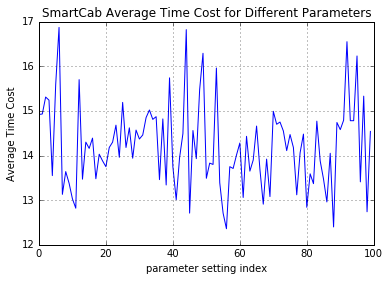

In [125]:
avg_time = []
time_cost = data['deadline'] - data['end_time']
param_list = []
for p in param:
    param_list.append(p)
    p_bool = data['parameters'] == p
    tc = time_cost[p_bool]
    avg_tc = tc.mean()
    avg_time.append(avg_tc)
param_id = range(len(param))
plt.plot(param_id, avg_time);plt.xlabel('parameter setting index'); 
plt.ylabel('Average Time Cost'); plt.grid(True)
plt.title('SmartCab Average Time Cost for Different Parameters');plt.show()

In [124]:
low_time_cost = [i for i,t in enumerate(avg_time) if t<=14]
# the parameter settings acheived efficient customer delivery/low time cost
low_time_param = [param_list[i] for i in low_time_cost] 

In [123]:
list(set(high_sr_param) & set(low_penalty_param) & set(low_time_param))

['(0.8, 0.6, 0.4)', '(0.7, 0.6, 0.3)']

**Summary**: the parameter combinations stored in variable `low_time_param` are the parameters settings which trained the SmartCab to reach destination relatively efficiently during the 100-trial-run simulation.

***
**Average Net Rewards**

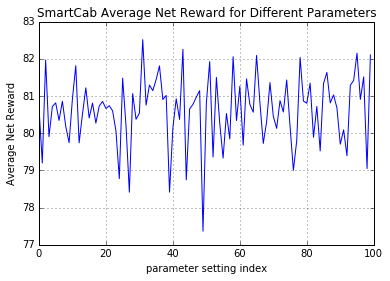

In [126]:
avg_net_reward = []
param_list = []
for p in param:
    param_list.append(p)
    p_bool = data['parameters']==p
    reward = data['net_reward'][p_bool]
    avg_reward  = reward.mean() + 60
    avg_net_reward.append(avg_reward)
plt.plot(param_id, avg_net_reward);plt.xlabel('parameter setting index'); 
plt.ylabel('Average Net Reward'); plt.grid(True)
plt.title('SmartCab Average Net Reward for Different Parameters');plt.show()

In [131]:
high_net_reward = [i for i,r in enumerate(avg_net_reward) if r>=81.5]
# the parameter settings acheived efficient customer delivery/low time cost
high_reward_param = [param_list[i] for i in high_net_reward]
len(high_reward_param)

14

**Summary**: the parameter combinations stored in variable `high_reward_param` are the parameters settings received relatively high average net rewards during the 100-trial-run simulation.
***
### Parameter Tuning - Performance Analysis Summary
Pick the parameter setting which trained the SmartCab which acheived a high successful customer delivery rate, low penalty punishment, delivered the customer efficiently/with low time cost, and high net rewards.

In [136]:
optimal_params = list(set(high_sr_param) & set(low_penalty_param) & set(low_time_param) & set(high_reward_param))
optimal_params

['(0.7, 0.6, 0.3)']

In [137]:
print 'The optimal parameter: omega = 0.7, gamma (discount factor) = 0.6, epsilon (exploration rate) = 0.3.'

The optimal parameter: omega = 0.7, gamma (discount factor) = 0.6, epsilon (exploration rate) = 0.3.


***
**SmartCab Performance Trained by Optimal Parameter**

In [138]:
optimal_data = data.loc[data.index[data['parameters']==optimal_params[0]]]

In [141]:
success_rate_opt_param = sum(optimal_data['success'])/float(100)
avg_penalty_opt_param = optimal_data['penalty'].mean()
avg_net_reward_opt_param = optimal_data['net_reward'].mean()
avg_time_cost_opt_param = (optimal_data['deadline'] - optimal_data['end_time']).mean()

In [145]:
print "Success Rate of SmartCab trained by optimal parameter setting: %.2f" %success_rate_opt_param
print "Received Average Penalty of SmartCab trained by optimal parameter setting: ", avg_penalty_opt_param
print "Received Average Net Reward of SmartCab trained by optimal parameter setting: ", avg_net_reward_opt_param
print "Average Time Cost for SmartCab trained by optimal parameter setting: ", avg_time_cost_opt_param

Success Rate of SmartCab trained by optimal parameter setting: 0.96
Received Average Penalty of SmartCab trained by optimal parameter setting:  -3.8
Received Average Net Reward of SmartCab trained by optimal parameter setting:  21.81
Average Time Cost for SmartCab trained by optimal parameter setting:  13.46
